In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

In [5]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [6]:
path='kddcup.data_10_percent.txt'
df = pd.read_csv(path,names=columns)
df.drop(df.head(1).index,inplace=True)
df

C:\Users\subhalaji\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
5,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [7]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,...,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025615e+03,8.685197e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148243,0.010212,...,232.471230,188.666034,0.753779,0.030906,0.601936,0.006686,0.176773,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355341,1.798328,...,64.744665,106.040236,0.410781,0.109259,0.481309,0.042157,0.380800,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000


In [8]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97276
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
0.00                     1
Name: target, dtype: int64

In [9]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                        object
num_file_creations              object
num_shells                      object
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [10]:
df.iloc[ 0:3000 , : ]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0,tcp,http,SF,253,1001,0,0,0,0,...,255,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2997,0,tcp,http,SF,153,35215,0,0,0,0,...,255,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2998,0,tcp,http,SF,230,258,0,0,0,0,...,255,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2999,0,tcp,http,SF,234,1931,0,0,0,0,...,255,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.


In [11]:
with open("datasets_90131_208170_training_attack_types",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [12]:
attacks_types = {
    'normal.': 'normal',
'back.': 'dos',
'buffer_overflow.': 'others',
'ftp_write.': 'others',
'guess_passwd.': 'others',
'imap.': 'other',
'ipsweep.': 'other',
'land.': 'dos',
'loadmodule.': 'other',
'multihop.': 'other',
'neptune.': 'dos',
'nmap.': 'other',
'perl.': 'other',
'phf.': 'other',
'pod.': 'dos',
'portsweep.': 'other',
'rootkit.': 'other',
'satan.': 'other',
'smurf.': 'dos',
'spy.': 'other',
'teardrop.': 'dos',
'warezclient.': 'other',
'warezmaster.': 'other',
'0.00':'normal'
}

In [13]:
df['Attack_Type'] = df.target.apply(lambda r:attacks_types[r[:]])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack_Type
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal
5,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [14]:
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack_Type')

cate_cols

['flag',
 'num_file_creations',
 'service',
 'num_root',
 'protocol_type',
 'num_shells']

In [15]:
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

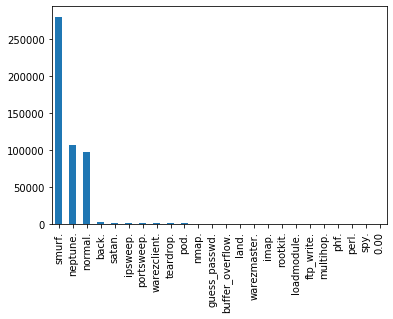

In [16]:
bar_graph('target')

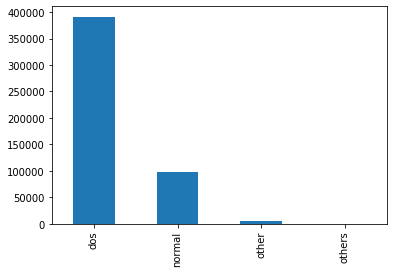

In [17]:
bar_graph('Attack_Type')

In [18]:
#encoding
df['Attack_Type'] = df['Attack_Type'].map({'normal': 0, 'dos': 1, 'other': 2})

In [19]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack_Type
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,0.0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,0.0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,0.0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,0.0
5,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,0.0


In [20]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack_Type
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,0.0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,0.0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,0.0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,0.0
5,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,0.0


In [21]:
#One Hot Encoding
#from sklearn.preprocessing import OneHotEncoder 
#from sklearn.compose import ColumnTransformer 
   
# creating one hot encoder object with categorical feature 0 
# indicating the first column 
#columnTransformer = ColumnTransformer([('encoder', 
#                                       OneHotEncoder(), 
#                                        [43])], 
#                                     remainder='passthrough') 
  
#data = np.array(columnTransformer.fit_transform(Attack_Type)) 

In [22]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack_Type
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.,0.0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,0.0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,0.0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.,0.0
5,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.,0.0
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,0.0
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.,0.0
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.,0.0


In [23]:
from scipy import stats
x=stats.mode(df.src_bytes)
print(x)

ModeResult(mode=array([1032], dtype=int64), count=array([228035]))


In [24]:
from scipy import stats
x=stats.mode(df.dst_bytes)
print(x)

ModeResult(mode=array([0], dtype=int64), count=array([408259]))


In [25]:
x=np.median(df.src_bytes)
y=np.median(df.dst_bytes)
print(x)
print(y)

520.0
0.0


In [26]:
df['src_bytes'].mean()

3025.615377919922

In [27]:
df[['duration','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate']].mean()

duration                         47.979400
src_bytes                      3025.615378
dst_bytes                       868.519742
land                              0.000045
wrong_fragment                    0.006433
urgent                            0.000014
hot                               0.034519
num_failed_logins                 0.000152
logged_in                         0.148243
num_compromised                   0.010212
dst_host_count                  232.471230
dst_host_srv_count              188.666034
dst_host_same_srv_rate            0.753779
dst_host_diff_srv_rate            0.030906
dst_host_same_src_port_rate       0.601936
dst_host_srv_diff_host_rate       0.006686
dst_host_serror_rate              0.176773
dst_host_srv_serror_rate          0.176443
dst_host_rerror_rate              0.058118
dst_host_srv_rerror_rate          0.057412
dtype: float64

In [28]:
df[['duration','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate']].median()

duration                         0.0
src_bytes                      520.0
dst_bytes                        0.0
land                             0.0
wrong_fragment                   0.0
urgent                           0.0
hot                              0.0
num_failed_logins                0.0
logged_in                        0.0
num_compromised                  0.0
dst_host_count                 255.0
dst_host_srv_count             255.0
dst_host_same_srv_rate           1.0
dst_host_diff_srv_rate           0.0
dst_host_same_src_port_rate      1.0
dst_host_srv_diff_host_rate      0.0
dst_host_serror_rate             0.0
dst_host_srv_serror_rate         0.0
dst_host_rerror_rate             0.0
dst_host_srv_rerror_rate         0.0
dtype: float64

In [29]:
df.mode()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack_Type
0,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.,1.0


In [30]:
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [31]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack_Type
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,0.0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,0.0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,0.0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,0.0
5,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,59,59,0.0,0.02,0.0,normal.,0.0


In [32]:
df.shape

(494020, 35)

In [33]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack_Type'],
      dtype='object')

In [34]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190064
udp      20354
Name: protocol_type, dtype: int64

In [35]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [36]:
df['flag'].value_counts()

SF        378438
S0         87008
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [37]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack_Type
1,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,0.0
2,0,1,http,0,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,0.0
3,0,1,http,0,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,0.0
4,0,1,http,0,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,0.0
5,0,1,http,0,217,2032,0,0,0,0,...,1.0,0.0,0.0,59,59,0.0,0.02,0.0,normal.,0.0


In [38]:
df.drop('service',axis = 1,inplace= True)

In [39]:
df.shape

(494020, 34)

In [40]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack_Type
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,0.0
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,0.0
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,0.0
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,0.0
5,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,59,59,0.0,0.02,0.0,normal.,0.0


In [41]:
df.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations              object
num_shells                      object
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate            

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [43]:
df['Attack_Type'].value_counts()

1.0    391458
0.0     97277
2.0      5194
Name: Attack_Type, dtype: int64

In [44]:
# Target variable and train set
Y = df['Attack_Type']
print(Y)

1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
         ... 
494016    0.0
494017    0.0
494018    0.0
494019    0.0
494020    0.0
Name: Attack_Type, Length: 494020, dtype: float64


In [45]:

X = df.drop('Attack_Type', axis=1)
print(X)


        duration  protocol_type  flag  src_bytes  dst_bytes  land  \
1              0              1     0        239        486     0   
2              0              1     0        235       1337     0   
3              0              1     0        219       1337     0   
4              0              1     0        217       2032     0   
5              0              1     0        217       2032     0   
...          ...            ...   ...        ...        ...   ...   
494016         0              1     0        310       1881     0   
494017         0              1     0        282       2286     0   
494018         0              1     0        203       1200     0   
494019         0              1     0        291       1200     0   
494020         0              1     0        219       1234     0   

        wrong_fragment  urgent  hot  num_failed_logins  ...  rerror_rate  \
1                    0       0    0                  0  ...          0.0   
2                  

In [46]:
df.columns

Index(['duration', 'protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack_Type'],
      dtype='object')

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



ValueError: could not convert string to float: 'http'

In [ ]:
data=df.values
X = data[:, 0:39]
X

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.8, test_size=0.2)
print ("X_train, y_train:", X_train.shape, y_train.shape)
print ("X_test, y_test:", X_test.shape, y_test.shape)

X_train, y_train: (395216, 33) (395216,)
X_test, y_test: (98804, 33) (98804,)


In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss
print("Training and predicting")
learner = KNeighborsClassifier(1, n_jobs=-1)
learner.fit(X_train,y_train)
pred_y = learner.predict(X_test)

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)

print(results)
print(error)

Training and predicting


ValueError: could not convert string to float: 'normal.'

In [ ]:
df

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss
print("Training and predicting")
learner = KNeighborsClassifier(1, n_jobs=-1)
learner.fit(X_train,y_train)
pred_y = learner.predict(X_test)
pred_y
'''results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)

print(results)
print(error)'''

Training and predicting


ValueError: could not convert string to float: 'normal.'

In [51]:
# Add "boolean" column storing 0 for normal packets, 1 for malicious packets
df['is_attack'] = (df['Attack_Type'] != 0.0)
df

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack_Type,is_attack
1,0,1,0,239,486,0,0,0,0,0,...,0.0,0.00,19,19,0.0,0.05,0.00,normal.,0.0,False
2,0,1,0,235,1337,0,0,0,0,0,...,0.0,0.00,29,29,0.0,0.03,0.00,normal.,0.0,False
3,0,1,0,219,1337,0,0,0,0,0,...,0.0,0.00,39,39,0.0,0.03,0.00,normal.,0.0,False
4,0,1,0,217,2032,0,0,0,0,0,...,0.0,0.00,49,49,0.0,0.02,0.00,normal.,0.0,False
5,0,1,0,217,2032,0,0,0,0,0,...,0.0,0.00,59,59,0.0,0.02,0.00,normal.,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,1,0,310,1881,0,0,0,0,0,...,0.0,0.40,86,255,0.0,0.01,0.05,normal.,0.0,False
494017,0,1,0,282,2286,0,0,0,0,0,...,0.0,0.00,6,255,0.0,0.17,0.05,normal.,0.0,False
494018,0,1,0,203,1200,0,0,0,0,0,...,0.0,0.17,16,255,0.0,0.06,0.05,normal.,0.0,False
494019,0,1,0,291,1200,0,0,0,0,0,...,0.0,0.17,26,255,0.0,0.04,0.05,normal.,0.0,False


In [52]:
# See how many packets are normal vs malicious
df['is_attack'].value_counts()

True     396743
False     97277
Name: is_attack, dtype: int64

In [62]:
df = df.drop(['target',], axis=1)
Y = df[['is_attack']]
X = df.drop(['is_attack'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y,test_size=0.2, random_state=0)

In [63]:
print(X_train.shape)

(395216, 33)


In [64]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(X_train)
x_test=scaler.transform(X_test)
y_train=np.array(Y_train)
y_test=np.array(Y_test)

ValueError: could not convert string to float: 'http'

In [65]:
df

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,Attack_Type,is_attack
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.00,19,19,0.0,0.05,0.00,0.0,False
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.00,29,29,0.0,0.03,0.00,0.0,False
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.00,39,39,0.0,0.03,0.00,0.0,False
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.00,49,49,0.0,0.02,0.00,0.0,False
5,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.00,59,59,0.0,0.02,0.00,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,1,0,310,1881,0,0,0,0,0,...,1.0,0.0,0.40,86,255,0.0,0.01,0.05,0.0,False
494017,0,1,0,282,2286,0,0,0,0,0,...,1.0,0.0,0.00,6,255,0.0,0.17,0.05,0.0,False
494018,0,1,0,203,1200,0,0,0,0,0,...,1.0,0.0,0.17,16,255,0.0,0.06,0.05,0.0,False
494019,0,1,0,291,1200,0,0,0,0,0,...,1.0,0.0,0.17,26,255,0.0,0.04,0.05,0.0,False
